In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 11.8 MB/s eta 0:00:0000:0100:01


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 16.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 95.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3301373 sha256=3215c3fe83b5a684f7117f4291f8b363e0cc8d2e0b3df45c207908da46a8c8bb
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566165 sha256=580d6d6f9df71e327de36db2abd8c6ae38aa0c7cbd60d10e11e1be6d0ac5f97c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built dlib face-recognition-models


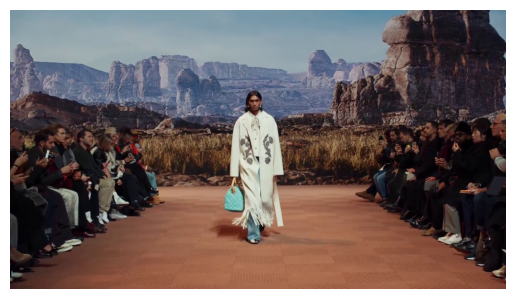

In [5]:
import os
import cv2
import matplotlib.pyplot as plt

i = 584
IMAGE_FILE = os.path.join('./defile-2024-lv-short', f"frame_{i}.jpg") # your image
image = cv2.imread(IMAGE_FILE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour matplotlib

plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m-pose.pt')  # load an official model

100%|██████████| 50.8M/50.8M [00:00<00:00, 204MB/s] 


In [8]:
# Predict with the model
results = model(IMAGE_FILE)  # predict on an image


image 1/1 /kaggle/input/defile-2024-lv-short/frame_584.jpg: 384x640 18 persons, 154.1ms
Speed: 11.6ms preprocess, 154.1ms inference, 286.0ms postprocess per image at shape (1, 3, 384, 640)


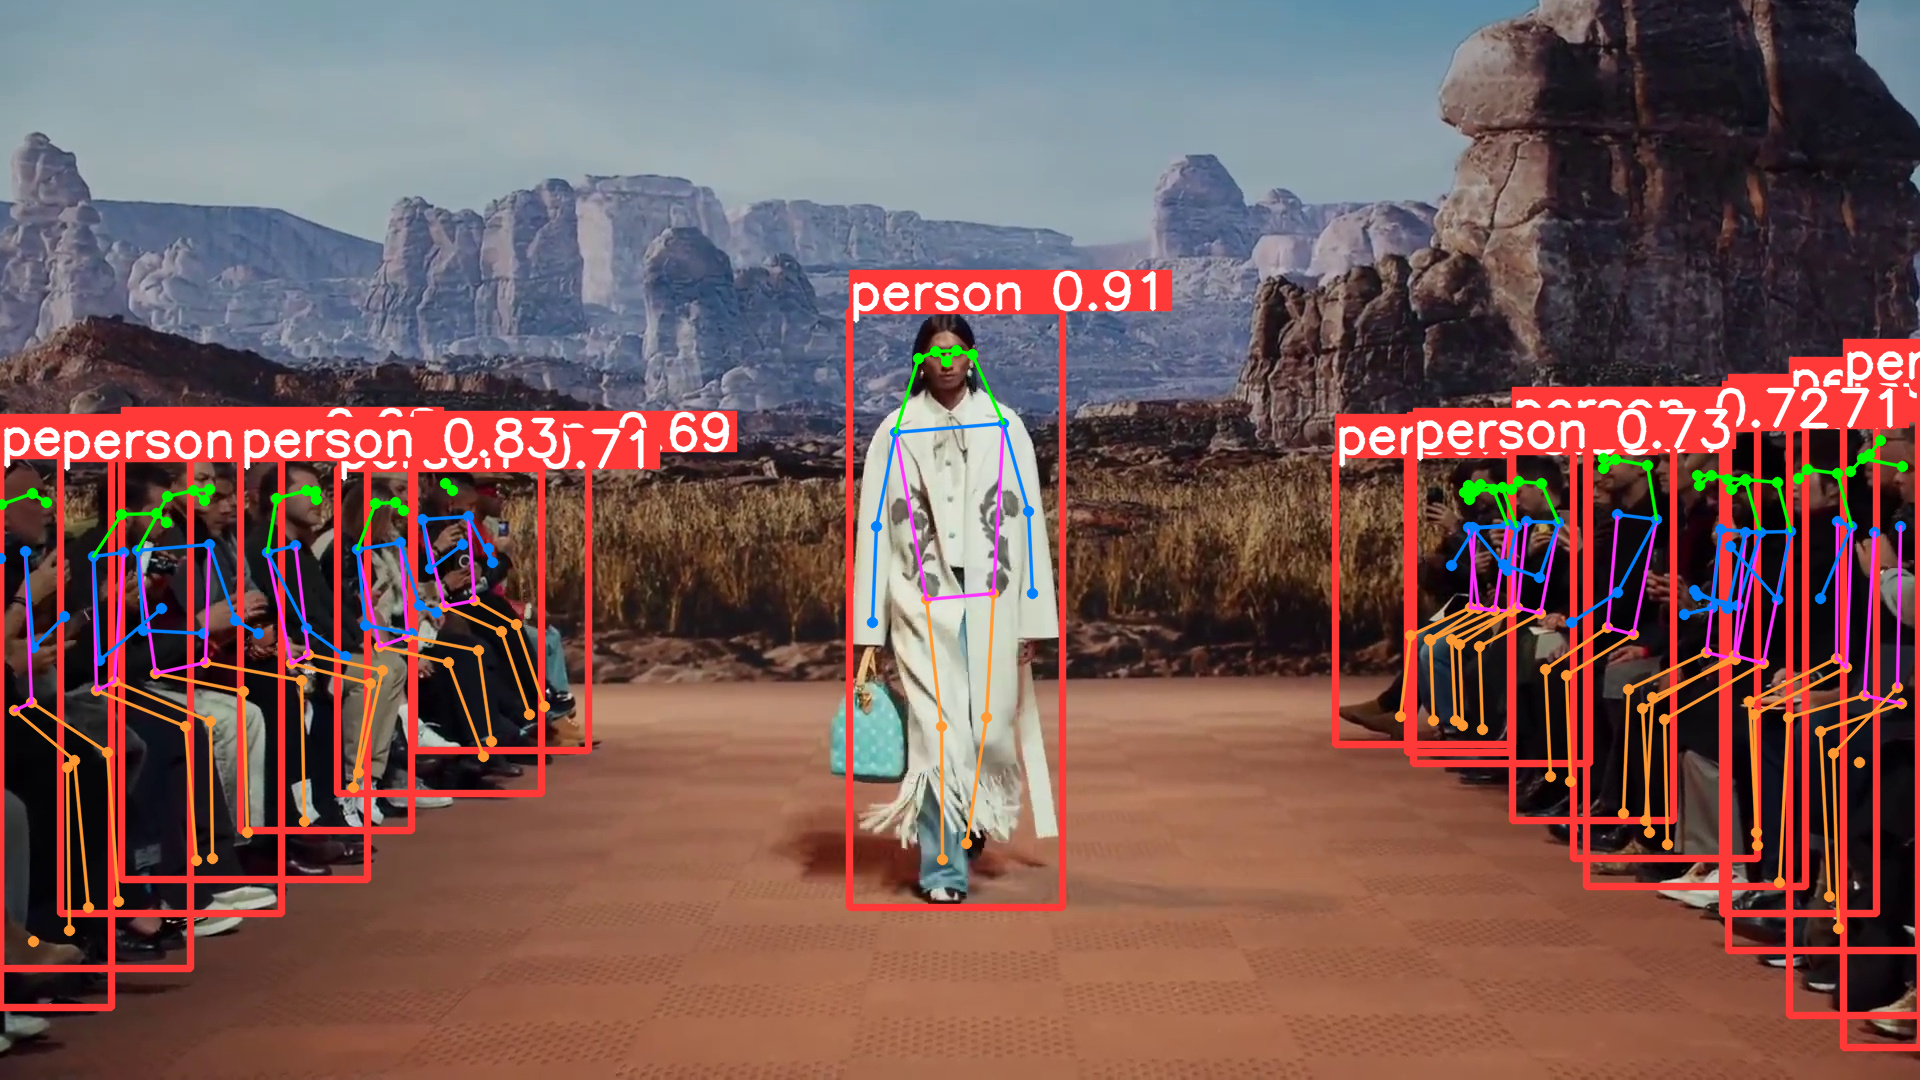

In [64]:
import cv2
from PIL import Image

plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [40]:
print("Conf Boxe: ",results[0].boxes.conf[0].tolist())
print("Conf Boxe: ",results[0].boxes.xyxy[0].tolist())

Conf Boxe:  0.907988429069519
Conf Boxe:  [849.0, 310.0, 1062.0, 907.0]


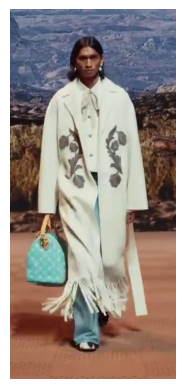

In [41]:
import numpy as np

box_coords = results[0].boxes.xyxy[0].tolist()

# Extraire les coordonnées de la boîte
left, top, right, bottom = map(int, box_coords)

left = (0 if left - 50 < 0 else left - 50)
top = (0 if top - 50 < 0 else top - 50)

right = (image.shape[1] if right + 50 > image.shape[1] else right + 50)
bottom = (image.shape[0] if bottom + 50 > image.shape[0] else bottom + 50)

# Extraire la région de la boîte de l'image d'origine
box_region = image[top:bottom, left:right]

# Créer une nouvelle image avec la boîte sur un fond blanc
box_image = np.zeros((bottom - top, right - left, 3), dtype=np.uint8)
box_image.fill(255)  # Remplir avec du blanc
box_image[0:bottom - top, 0:right - left] = box_region

box_image_save = cv2.cvtColor(box_image, cv2.COLOR_BGR2RGB)

plt.imshow(box_image)
plt.axis('off')
plt.show()

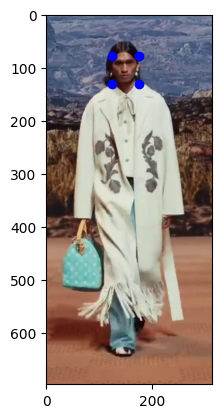

In [42]:
import face_recognition

plt.imshow(box_image)        

# Find all the faces and face encodings in the current frame of video
face_locations = face_recognition.face_locations(box_image)

# If faces were found, we will mark it on frame with blue dots
for face_location in face_locations:        
    plt.plot(face_location[1], face_location[0], 'bo')
    plt.plot(face_location[1], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[0], 'bo')

# Show frame...
plt.show() 

In [43]:
image_to_test_encoding = face_recognition.face_encodings(box_image)

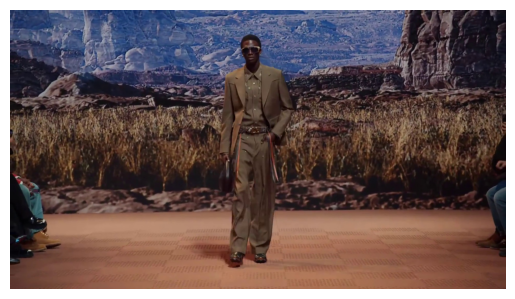

In [52]:
import os
import cv2
import matplotlib.pyplot as plt

i = 1200
IMAGE_FILE = os.path.join('/kaggle/input/defile-2024-lv-short', f"frame_{i}.jpg") # your image
image = cv2.imread(IMAGE_FILE)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour matplotlib

plt.imshow(image)
plt.axis('off')
plt.show()

In [53]:
# Predict with the model
results = model(IMAGE_FILE)  # predict on an image


image 1/1 /kaggle/input/defile-2024-lv-short/frame_1200.jpg: 384x640 3 persons, 13.8ms
Speed: 2.4ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


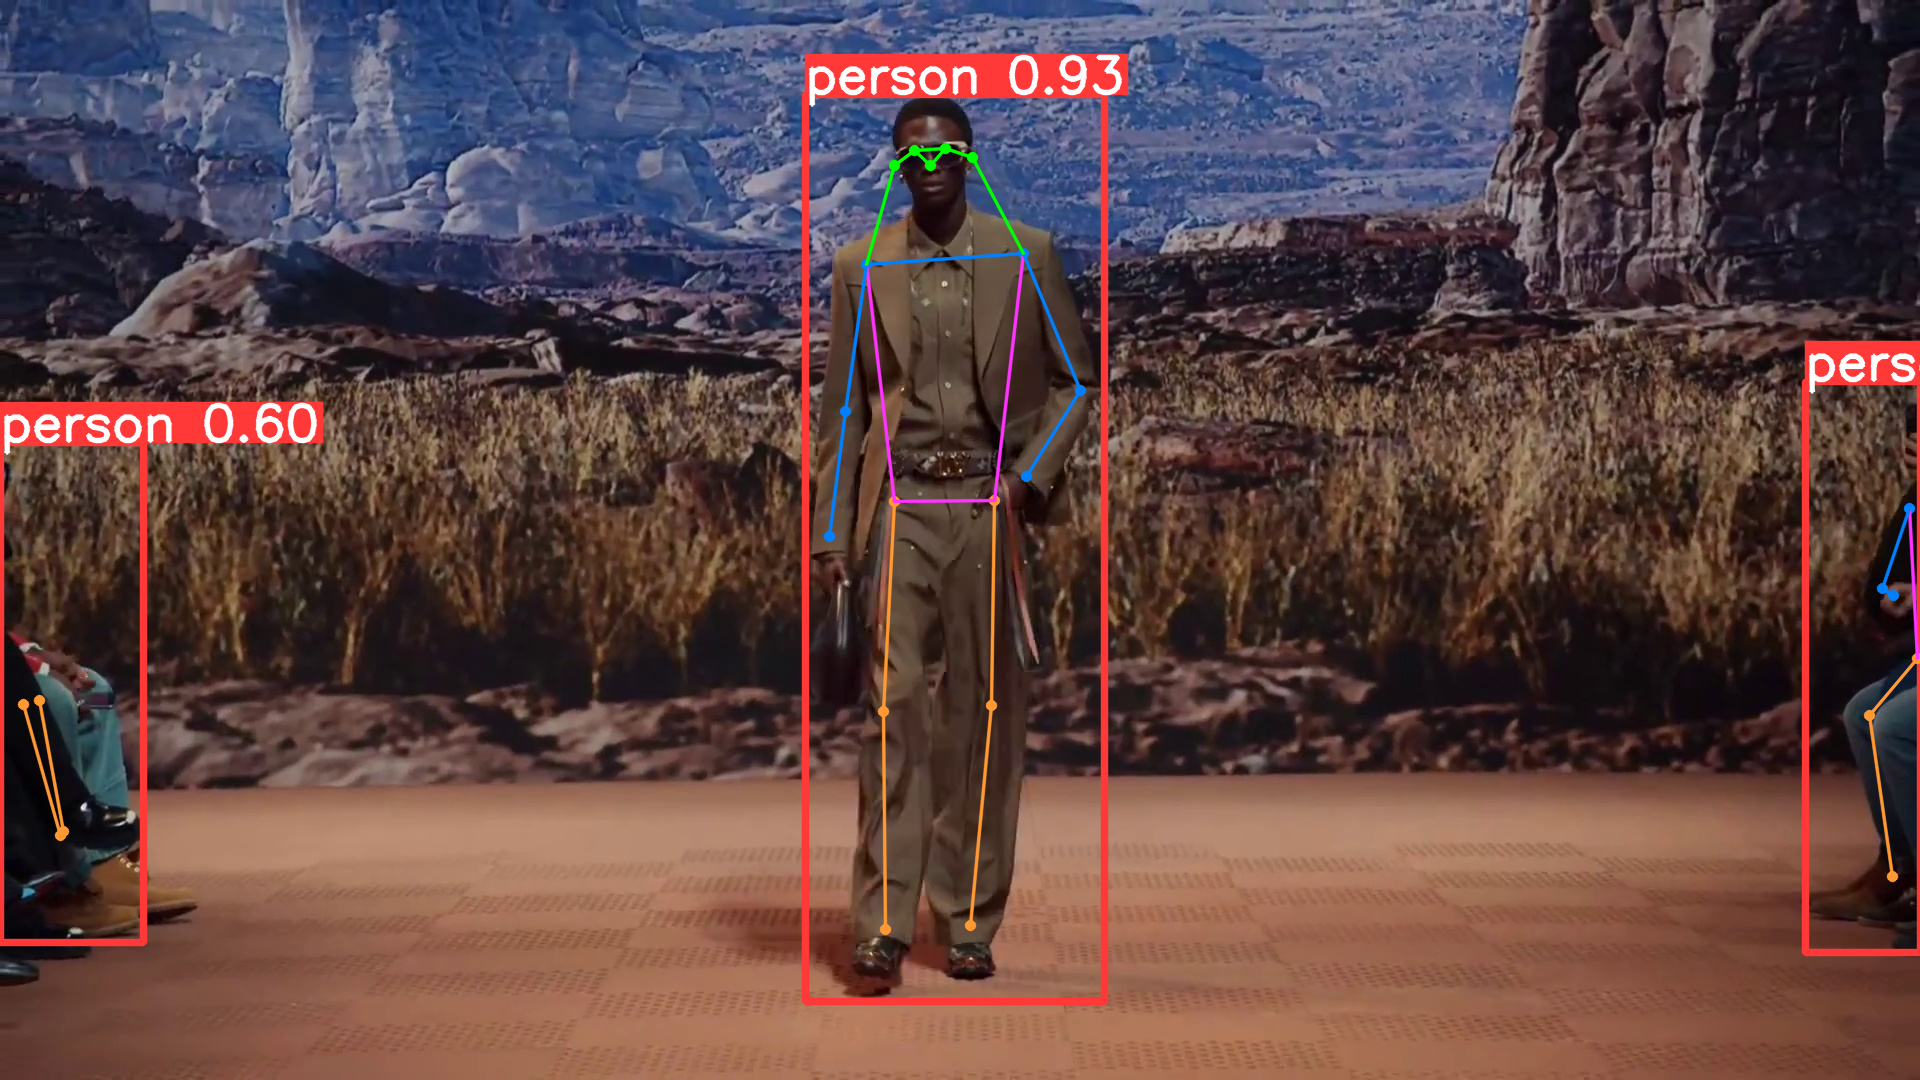

In [54]:
import cv2
from PIL import Image

plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [47]:
print("Conf Boxe: ",results[0].boxes.conf[0].tolist())
print("Conf Boxe: ",results[0].boxes.xyxy[0].tolist())

Conf Boxe:  0.9297553300857544
Conf Boxe:  [805.0, 94.0, 1104.0, 1001.0]


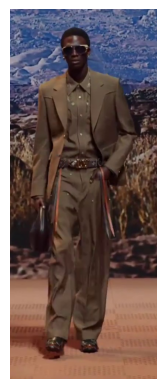

In [48]:
import numpy as np

box_coords = results[0].boxes.xyxy[0].tolist()

# Extraire les coordonnées de la boîte
left, top, right, bottom = map(int, box_coords)

left = (0 if left - 50 < 0 else left - 50)
top = (0 if top - 50 < 0 else top - 50)

right = (image.shape[1] if right + 50 > image.shape[1] else right + 50)
bottom = (image.shape[0] if bottom + 50 > image.shape[0] else bottom + 50)

# Extraire la région de la boîte de l'image d'origine
box_region = image[top:bottom, left:right]

# Créer une nouvelle image avec la boîte sur un fond blanc
box_image2 = np.zeros((bottom - top, right - left, 3), dtype=np.uint8)
box_image2.fill(255)  # Remplir avec du blanc
box_image2[0:bottom - top, 0:right - left] = box_region

box_image_save2 = cv2.cvtColor(box_image2, cv2.COLOR_BGR2RGB)

plt.imshow(box_image2)
plt.axis('off')
plt.show()

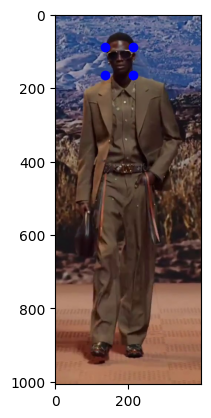

In [49]:
import face_recognition

plt.imshow(box_image2)        

# Find all the faces and face encodings in the current frame of video
face_locations = face_recognition.face_locations(box_image2)

# If faces were found, we will mark it on frame with blue dots
for face_location in face_locations:        
    plt.plot(face_location[1], face_location[0], 'bo')
    plt.plot(face_location[1], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[2], 'bo')
    plt.plot(face_location[3], face_location[0], 'bo')

# Show frame...
plt.show() 

In [50]:
image_to_test_encoding2 = face_recognition.face_encodings(box_image2)

In [51]:
results = face_recognition.compare_faces(image_to_test_encoding2, image_to_test_encoding[0])

if results[0] == True:
    print("It's the same mannequin!")
else:
    print("It's not the same mannequin!")

It's not the same mannequin!


In [55]:
def calculate_pose_score(results):
    list_keypoints_labels = ["Nose", "Left-eye", "Right-eye", "Left-ear", "Right-ear", "Left-shoulder", "Right-shoulder", "Left-elbow", "Right-elbow", "Left-wrist", "Right-wrist", "Left-hip", "Right-hip", "Left-knee", "Rigt-knee", "Left-ankle", "Right-ankle"]
    
    pose_keypoints_conf = results[0].keypoints.conf[0].tolist()
    num_detected_keypoints = 0
    total_keypoints = len(pose_keypoints_conf)
    
    for cf in pose_keypoints_conf:
        if cf > 0.7:  # Check if the landmark is visible
            num_detected_keypoints += 1

    # Calculate the percentage of detected landmarks compared to total landmarks.
    pose_score = (num_detected_keypoints / total_keypoints) * 100
    
    dico_pose = {list_keypoints_labels[i]: pose_keypoints_conf[i] for i in range(len(list_keypoints_labels))}

    return pose_score, dico_pose

In [58]:
# Indentification of each member from the body
calculate_pose_score(results)

(100.0,
 {'Nose': 0.9892237782478333,
  'Left-eye': 0.9644837379455566,
  'Right-eye': 0.951749861240387,
  'Left-ear': 0.860584557056427,
  'Right-ear': 0.76936936378479,
  'Left-shoulder': 0.9988151788711548,
  'Right-shoulder': 0.9982421398162842,
  'Left-elbow': 0.9952947497367859,
  'Right-elbow': 0.9914385080337524,
  'Left-wrist': 0.9901878237724304,
  'Right-wrist': 0.9830834865570068,
  'Left-hip': 0.9993597865104675,
  'Right-hip': 0.9992389678955078,
  'Left-knee': 0.9968701004981995,
  'Rigt-knee': 0.9962054491043091,
  'Left-ankle': 0.9687932133674622,
  'Right-ankle': 0.9654844999313354})